# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


**Question 1:** Is the distribution of body temperatures normal?

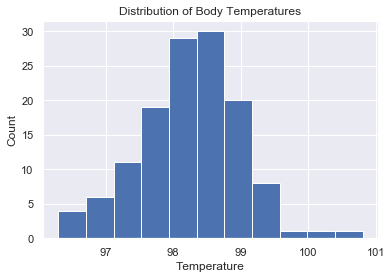

In [3]:
sns.set()
n_bins = np.sqrt(df['temperature'].size)
n_bins = int(n_bins)
_ = plt.hist(df['temperature'], bins=n_bins)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of Body Temperatures')

plt.show()

Based on the distribution graph, the body temperature data are roughly normally distributed, though there is more density on the left of the distribution than on the right.

**Question 2:** Is the sample size large? Are the observations independent?

In [4]:
print(df.shape)
print(df.head(10))

(130, 3)
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
5         99.2      M        83.0
6         98.0      M        71.0
7         98.8      M        78.0
8         98.4      F        84.0
9         98.6      F        86.0


There are 130 body temperature measurements taken, so the sample size is sufficiently large enough for the Central Limit Theorem to hold (as n > 30). Assuming the data are body temperature measurements of different individuals chosen at random, then the observations are also independent.

**Question 3:** Is the true population mean 98.6 degrees Farenheit?

**_H<sub>0</sub>: The true mean is 98.6 degrees F_**

**_H<sub>a</sub>: The true mean is not 98.6 degrees F_**

In [5]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1-dimensional data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_from_true_mean(data, true_mean=98.6):
    return (np.mean(data) - true_mean)

# Seed the random number generator
np.random.seed(175392)

true_mean = 98.6
sample_mean = np.mean(df['temperature'])

diff_obs = sample_mean - true_mean
print('The sample mean is', round(np.mean(df['temperature']), 2), 'and the difference from the true mean is', 
      round(diff_obs, 2), 'degrees F')

body_temp_shifted = df['temperature'].values - np.mean(df['temperature']) + true_mean

bs_replicates = draw_bs_reps(body_temp_shifted, diff_from_true_mean, 10000)

p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)

print('The p-value is ' + str(p_value))

The sample mean is 98.25 and the difference from the true mean is -0.35 degrees F
The p-value is 0.0


As the p-value for the bootstrap hypotesis test is 0, the population mean is **not** 98.6 degrees F.

For frequentist statistical testing, we should use a one-sample test, as we are testing a sample to against the population mean of 98.6 degrees F. As the sample size is > 30 and the observations are independent and normally distributed, it is appropriate to use the z-statistic because the standard deviation of the sample will be a reasonable estimation of the population standard deviation.

In [6]:
from scipy import stats

sample_std = np.std(df['temperature'])
n = df['temperature'].size
z_val = (sample_mean - true_mean) / (sample_std / np.sqrt(n))
z_statistic = stats.norm.cdf(z_val) * 2
crit_z = stats.norm.ppf(0.975)
print("The z-value is", round(z_val, 4), 'and the p-value (i.e. z-statistic) is', round(z_statistic, 10))
print("The critical z-value for a significance level of 5% is +/-", round(crit_z, 6))

The z-value is -5.4759 and the p-value (i.e. z-statistic) is 4.35e-08
The critical z-value for a significance level of 5% is +/- 1.959964


As the p-value is essentially 0 (~0.00000004), and the calculated z-value of -5.48 is less than the critical z-value of -1.96, we reject the null hypothesis. That is, the population mean is **not** 98.6 degrees F.

We can also calculate the t-statistic to compare it to the z-statistic. The t-value is calculated using the same formula as the z-value in this case, as we are using the standard deviation of the sample to estimate the standard deviation of the population. The t-statistic will be determined using the Student t distribution rather than the normal distribution, however.

In [7]:
t_val = z_val
t_statistic = stats.t.cdf(t_val, n-1) * 2
crit_t = stats.t.ppf(0.975, n-1)
print("The t-value is", round(t_val, 4), "and the p-value (i.e. t-statistic) is", round(t_statistic, 10))
print("The critical t-value for a significance level of 5% is +/-", round(crit_t, 6))

The t-value is -5.4759 and the p-value (i.e. t-statistic) is 2.189e-07
The critical t-value for a significance level of 5% is +/- 1.978524


The z-statistic and t-statistic are essentially the same because the sample size is 130, so the standard
deviation of the sample is very close to the standard deviation of the population.

**Question 4:** Draw a small sample of size 10 from the data and repeat both frequentist tests.
    <li> Which one is the correct one to use? 
        <ul><li> The t-statistic is the correct test to use as the sample size is less than 30 (n < 30)</ul>
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [8]:
n_small = 10
np.random.seed(100)
small_sample = np.random.choice(df['temperature'].values, n_small)
small_mean = np.mean(small_sample)
small_std = np.std(small_sample)
t_val = (small_mean - true_mean) / (small_std / np.sqrt(n_small))
t_stat_small = stats.t.cdf(0.975, n_small-1) * 2
crit_t_small = stats.t.ppf(0.975, n_small-1)
print('The t-value is', round(t_val, 4), 'and the p-value (i.e. t-statistic) is', round(t_stat_small, 4))
print("The critical t-value for a significance level of 5% is +/-", round(crit_t_small, 4))

z_val = (small_mean - true_mean) / (small_std / np.sqrt(n_small))
z_stat_small = stats.norm.cdf(z_val) * 2
crit_z_small = stats.norm.ppf(0.975)
print("The z-value is", round(z_val, 4), "and the p-value (i.e. z-statistic) is", round(z_stat_small, 4))
print("The critical z-value for a significance level of 5% is +/-", round(crit_z_small, 4))


The t-value is -1.9232 and the p-value (i.e. t-statistic) is 1.645
The critical t-value for a significance level of 5% is +/- 2.2622
The z-value is -1.9232 and the p-value (i.e. z-statistic) is 0.0545
The critical z-value for a significance level of 5% is +/- 1.96


Both the t-statistic and the z-statistic indicate that there is not a significant difference between the sample and the predicted population mean of 98.6 degrees F. Because n is small (10), the z-statistic is not approprite to use in this situation. The t-statistic does not find a significant difference with such a small n because there are not enough data points in the sample to distinguish small differences in the mean, as we see in the human body temperature data. In order to determine statistical significance between a sample mean and a hypothetical population mean, either the n  or the difference in the means need to be large.

**Question 5:** At what temperature should we consider someone's temperature to be abnormal?

The question first asks us to calculate the 95% confidence interval using both a bootstrap method and a frequentist approach, which I have done in the code block below. However, these are the 95% confidence intervals of the mean distribution, meaning that there is a 95% chance that the true population mean lies within this interval. However, this doe **not** tell us the normal distribution of individual temperature measurements. 

To determine the prediction interval of normal body temperatures, we use the normal distribution . As the sample size is 130, the sample mean is a good approximation of the true population mean. We could also calculate the 95% confidence interval of the sample mean (i.e. 95% chance that the confidence interval contains the true population mean) and then base the range of normal values on the confidence interval of the mean distribution.

In [9]:
# Draw bootstrap replicates of the mean temperature
bs_replicates_mean = draw_bs_reps(df['temperature'].values, np.mean, 10000)

# Compute the 95% confidence interval of the mean distribution
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('The 95% confidence interval of the mean as determined by bootstrapping is', round(conf_int[0], 2), 
      'degrees F to', round(conf_int[1], 2), 'degrees F')
# Print the margin of error (moe)
print('The margin of error of the mean by bootstrapping is', round((conf_int[1]-conf_int[0])/2, 3), 'degrees F')

# Frequntist method to calculate confidence interval and moe of the mean
moe = crit_t * (sample_std / np.sqrt(n))
freq_lower_ci = sample_mean - crit_z * (sample_std / np.sqrt(n))
freq_upper_ci = sample_mean + crit_z * (sample_std / np.sqrt(n))

print('The frequentist 95% confidence interval of the mean is', round(freq_lower_ci, 2), 'to', round(freq_upper_ci, 2), 'degrees F')
print('The frequentist margin of error of the mean is', round(moe, 3), 'degrees F')

# Frequentist method of calculating prediction interval
freq_lower_pi = sample_mean - (crit_t * sample_std * np.sqrt(1+1/n))
freq_upper_pi = sample_mean + (crit_t * sample_std * np.sqrt(1+1/n))
print('The frequentist 95% prediction interval is', round(freq_lower_pi, 2), 'to', round(freq_upper_pi, 2), 'degrees F')

The 95% confidence interval of the mean as determined by bootstrapping is -0.12 degrees F to 0.12 degrees F
The margin of error of the mean by bootstrapping is 0.123 degrees F
The frequentist 95% confidence interval of the mean is 98.12 to 98.37 degrees F
The frequentist margin of error of the mean is 0.127 degrees F
The frequentist 95% prediction interval is 96.8 to 99.7 degrees F


We should consider a measured body temperature to be abnormal if it is less than 96.8 degrees F or more than 99.7 degrees F

**Question 6:** Is there a significant difference between males and females in normal temperature?

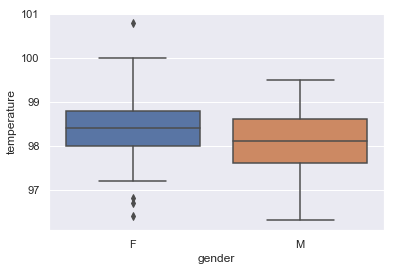

In [10]:
# First, just some EDA to look at the body temperatures of males and females
sns.boxplot(x='gender', y='temperature', data=df)
plt.show()

In [11]:
# Function to generate permutation sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Function to generate permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    
    return perm_replicates   
    
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = abs(np.mean(data_1) - np.mean(data_2))

    return diff

female_df = df[(df.gender == 'F')]
female_temps = female_df['temperature'].values

male_df = df[(df.gender == 'M')]
male_temps = male_df['temperature'].values

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(male_temps, female_temps)
print('Mean female temperature:', round(np.mean(female_temps), 2), 'degrees F')
print('Mean male temperature:', round(np.mean(male_temps), 2), 'degrees F')
print('The difference between male and female temperatures is', round(empirical_diff_means, 2), 'degrees F')

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male_temps, female_temps, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
percent = round(p*100, 2)

# Print the result
print('The probability of getting the observed difference in mean temperature between males and females is', percent, '%')
print('The p-value is', p)


Mean female temperature: 98.39 degrees F
Mean male temperature: 98.1 degrees F
The difference between male and female temperatures is 0.29 degrees F
The probability of getting the observed difference in mean temperature between males and females is 2.66 %
The p-value is 0.0266


The p-value is less than 0.05 (i.e. less than 5% probability) that the observed difference in the male and female temperatures would occur assuming that the temperature distributions are identical. Therefore, we reject the null hypothesis that there is no difference between male and female temperatures.

In conclusion, the dataset indicate that the mean human body temperature is actually 98.25 +/- 0.127 degrees F, rather than 98.6 degrees F. We can also conclude that the mean female body temperature is warmer than the mean male body temperature.